## Exercise 1

Create a vectorized version of log and exp math function for 1D array A = [2, 5, 10, 3, 8]

Results should be: 
+ [0.6931472 1.609438  2.3025851 1.0986123 2.0794415]
+ [7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]

In [22]:
import numpy as np
from numba import vectorize, float32, cuda

@vectorize([float32(float32)], target='parallel', fastmath=True) 
#to use cuda target must become cuda. Since emulator has a bug we use parallel
def log(x):
    c =  np.log(x)
    return c

A = np.float32([2,5,10,3,8])
l = log(A)
print(l)

[0.6931472 1.609438  2.3025851 1.0986123 2.0794415]


In [24]:
@vectorize([float32(float32)], target='parallel', fastmath=True) 
#to use cuda target must become cuda. Since emulator has a bug we use parallel
def exp(x):
    c =  np.exp(x)
    return c

e = exp(A)

print(e)


[7.3890562e+00 1.4841316e+02 2.2026465e+04 2.0085537e+01 2.9809580e+03]


## Exerice 2
Compute the value of a Gaussian probability density function at $x$ with $mean = 1$, $\sigma = 1$, lower and upper bound in $(-3, 3)$ and $size = 100000$

In [27]:
@vectorize([float32(float32)], target='parallel', fastmath=True)
def gauss(x):
    return 1/np.sqrt(2*np.pi)*np.exp(-(x - 1)**2/2)

x = np.linspace(-3, 3, 100000, dtype = 'float32')

g = gauss(x)

print(g)

[0.00013383 0.00013386 0.00013389 ... 0.05400392 0.05399745 0.05399097]


## Exercise 3

Create a "zero suppression" function. A common operation when working with waveforms is to force all samples values below a certain absolute magnitude to be zero, as a way to eliminate low amplitude noise. 
Plot the data before and after the application of the zero_suppress function.

$thresold = 15$

Text(0.5, 1.0, 'Data without zero suppression')

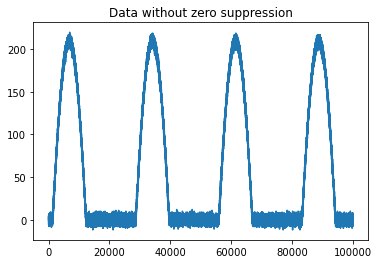

In [31]:
%matplotlib inline
from matplotlib import pyplot as plt
from numba import int16

n = 100000
noise = np.random.normal(size=n) * 3
pulses = np.maximum(np.sin(np.arange(n) / (n / 23)) - 0.3, 0.0)
data = ((pulses * 300) + noise).astype(np.int16)

plt.figure()
plt.plot(np.arange(0,n), data)
plt.title('Data without zero suppression')

Text(0.5, 1.0, 'Data with zero suppression')

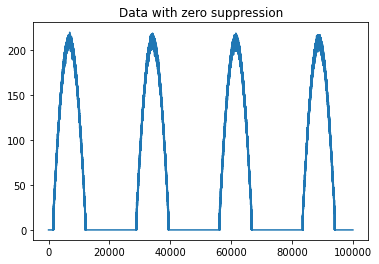

In [44]:
@vectorize([int16(int16)], target='parallel', fastmath=True)
def zero_suppression(x):
    if x <= 15:
        return 0
    else:
        return x

data_filtered = zero_suppression(data)

plt.figure()
plt.plot(np.arange(0,n), data_filtered)
plt.title('Data with zero suppression')

## Exercise 4

Calculate the Sigmoid kernel between the matrix X and Y defined as below. The Sigmoid kernel is defined as:

$k(x,y) = \tanh(\alpha x^T y + c) $

In [58]:
X = np.random.rand(3,3).astype('float32')
Y = np.random.rand(3,3).astype('float32')
io_array = np.zeros((3,3), dtype='float32')

@cuda.jit
def sigmoid_kernel(X, Y, alpha, c, io_array):
    x, y = cuda.grid(2) # For 2D array
    
    if (x, y) < np.shape(io_array):
        io_array[x,y] =  np.tanh(alpha*X.T*Y + c)# do the computation
    
sigmoid_kernel[(2,2), (3,3)](X, Y, 1, 1, io_array)

CudaSupportError: Error at driver init: 

CUDA driver library cannot be found.
If you are sure that a CUDA driver is installed,
try setting environment variable NUMBA_CUDA_DRIVER
with the file path of the CUDA driver shared library.
:

## Exercise 5

Create a kernel function similar to the ```double_kernel``` see during the lecture and create a new function that takes a 3 dimensional matrix as input calculating the $cos$ for each element and then returns the result. The shape of the matrix must be $256X256X256$. The matrix can be randomly generated

## Exercise 6

Create a matrix multiplication kernel function, called ```matmul``` that takes as input two 2D matrices:
+ A of shape $24x12$
+ B of shape $12x22$
and that computes the multiplication and put the results into a third matrix C of shape $24x12$

A and B must be randomly generated and only int values are allowed.


In [ ]:
from __future__ import division
from numba import cuda
import numpy
import math

# complete the code
@cuda.jit
def matmul(A, B, C):
    """Perform matrix multiplication of C = A * B
    """
    row, col = cuda.grid(2)
    if row < C.shape[0] and col < C.shape[1]:
        tmp = 0.
        for k in range(A.shape[1]):
            tmp += A[row, k] * B[k, col]
        C[row, col] = tmp

# Initialize the data arrays
A = 
B = 

# Configure the blocks
threadsperblock = 
blockspergrid_x = 
blockspergrid_y = 
blockspergrid = 

